## ML: Naive Bayes classification

In [95]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

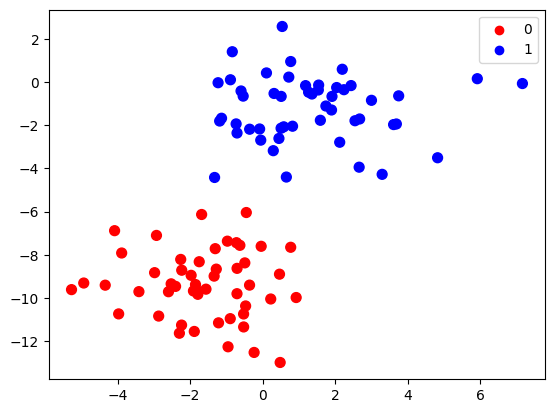

In [96]:
from sklearn.datasets import make_blobs
X,y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
colors=np.array(["red", "blue"])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=str(label))
plt.legend()

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y)

,priors,None
,var_smoothing,1e-09


El algoritmo Naïve Bayes ajusta dos distribuciones gaussianas bidimensionales a los datos. Las medias y las varianzas definen completamente estas distribuciones

In [98]:
print("Means:", model.theta_)
print("Standard deviations:", model.var_)

Means: [[-1.64939095 -9.36891451]
 [ 1.29327924 -1.24101221]]
Standard deviations: [[2.06097005 2.47716872]
 [3.33164807 2.22401384]]


Vamos a representar estas distribuciones. Primero definimos una función auxiliar para dibujar una elipse que muestre la desviación estándar en cada dirección desde el origen

In [ ]:
def plot_ellipse(ax, mu, sigma, color="k", label=None):

    from matplotlib.patches import Ellipse
    # Compute eigenvalues and associated eigenvectors
    vals, vecs = np.linalg.eigh(sigma)

    # Compute "tilt" of ellipse using first eigenvector
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Eigenvalues give length of ellipse along each eigenvector
    w, h = 2 * np.sqrt(vals)

    ax.tick_params(axis='both', which='major', labelsize=20)
    ellipse = Ellipse(mu, w, h, angle=theta, color=color)
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.2)
    ax.add_artist(ellipse)
    return ellipse

A continuación realizamos la representación gráfica:

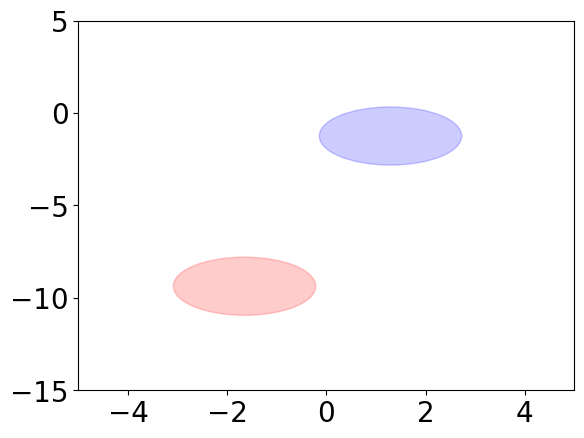

In [100]:
plt.figure()
plt.xlim(-5, 5)
plt.ylim(-15, 5)
plot_ellipse(plt.gca(), model.theta_[0], np.diag(model.var_[0]), color="red")
plot_ellipse(plt.gca(), model.theta_[1], np.diag(model.var_[0]), color="blue")

La métrica accuracy proporciona una medida de lo bien que hemos conseguido predecir las etiquetas. Su valor máximo es 1.0.

In [101]:
from sklearn.metrics import accuracy_score
y_fitted = model.predict(X)
acc=accuracy_score(y,y_fitted)
print("Accuracy score is", acc)

Accuracy score is 1.0


En este caso, la puntuación es la mejor posible, lo cual no es sorprendente, ya que hemos intentado predecir los mismos datos que ya habíamos visto. Más adelante dividiremos los datos en dos partes: una para entrenar el modelo y otra para evaluar su capacidad predictiva.

### Otro ejemplo

Vamos a generar más datos utilizando distribuciones normales multivariantes.

Multivariante --> cada observación tiene más de una variable

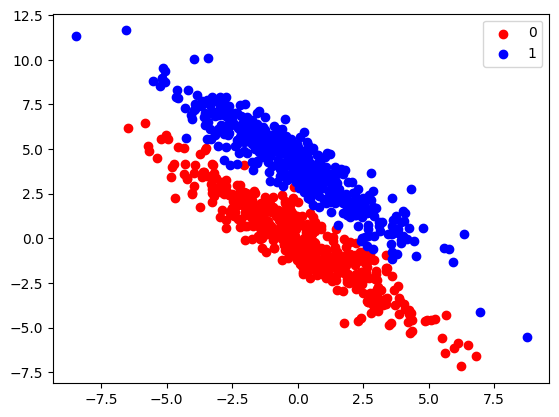

In [102]:
cov=np.array([[ 4.68, -4.32],
 [-4.32,  4.68]])
mean1 = [0,0]
mean2 = [0,4]
n=500
x1 = np.random.multivariate_normal(mean1, cov, n).T
x2 = np.random.multivariate_normal(mean2, cov, n).T
X=np.vstack([x1.T,x2.T])
y=np.hstack([[0]*n, [1]*n]).T
plt.scatter(X[:n,0], X[:n,1], color="red", label=0)
plt.scatter(X[n:,0], X[n:,1], color="blue", label=1)
plt.legend()

Los dos grupos de datos parecen estar claramente separados. Vamos a probar la clasificación mediante Naïve Bayes sobre este conjunto de datos.

In [103]:
model = GaussianNB()
model.fit(X, y)

,priors,None
,var_smoothing,1e-09


In [104]:
print("Means:", model.theta_)
print("Standard deviations:", model.var_)

Means: [[ 0.06966989 -0.08903891]
 [-0.03860421  4.08460096]]
Standard deviations: [[5.12377331 5.10774386]
 [5.06668522 5.02324987]]


Accuracy score 0.819


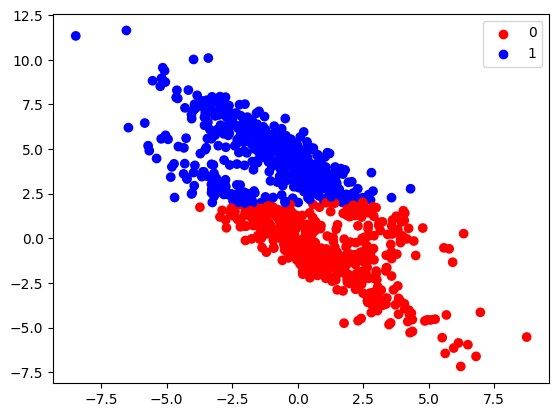

In [105]:
y_fitted = model.predict(X)
colors=np.array(["red", "blue"])
plt.scatter(X[:,0], X[:,1], color=colors[y_fitted])
plt.scatter([], [], color="red", label="0")
plt.scatter([], [], color="blue", label="1")
from sklearn.metrics import accuracy_score
acc=accuracy_score(y,y_fitted)
plt.legend()
print("Accuracy score", acc)

Aunque la puntuación es bastante buena, podemos ver en la gráfica que el algoritmo no ha aprendido buenos modelos para los datos. Podemos representar los modelos que utilizó el algoritmo:

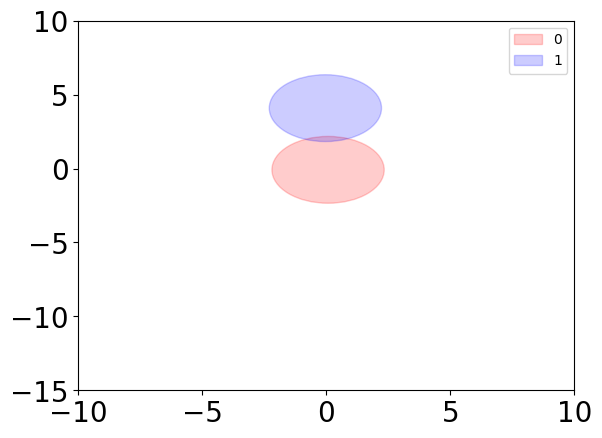

In [106]:
plt.figure()
plt.xlim(-10, 10)
plt.ylim(-15, 10)
e1=plot_ellipse(plt.gca(), model.theta_[0], np.diag(model.var_[0]), color="red", label="0")
e2=plot_ellipse(plt.gca(), model.theta_[1], np.diag(model.var_[0]), color="blue", label="1")
plt.legend([e1, e2], ["0", "1"])

El problema de la clasificación Naïve Bayes es que intenta modelar los datos utilizando distribuciones gaussianas que están alineadas con los ejes x e y. En este ejemplo, habríamos necesitado distribuciones gaussianas que estuvieran “inclinadas”.

### Clasificación de texto

A continuación vamos a intentar clasificar un conjunto de mensajes que fueron publicados en un foro público. Los mensajes se dividieron en grupos según sus temas, por lo que disponemos de un conjunto de datos listo para realizar pruebas de clasificación. Primero cargamos estos datos usando scikit-learn y vemos las categorías de los mensajes.

In [107]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Nos centraremos únicamente en cuatro categorías de mensajes. La herramienta fetch_20newsgroups nos permite dividir fácilmente los datos en conjuntos de entrenamiento y de prueba

In [108]:
categories = ['comp.graphics', 'rec.autos', 'sci.electronics', 'sci.crypt']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Vamos a ver lo que tenemos:

In [109]:
print("Training data:", "Data:", str(type(train.data)), len(train.data), "Target:", str(type(train.target)), len(train.target))
print("Test data:", "Data:", str(type(test.data)), len(test.data), "Target", str(type(test.data)), len(test.target))

Training data: Data: <class 'list'> 2364 Target: <class 'numpy.ndarray'> 2364
Test data: Data: <class 'list'> 1574 Target <class 'list'> 1574


Usamos como características las **frecuencias de cada palabra** en el conjunto de datos. Es decir, hay **tantas características como palabras distintas** haya en el dataset. Denotamos el número de características por \( f \). Como ahora las características son **recuentos**, es razonable utilizar una **distribución multinomial** (se usa cuando las features son recuento) en lugar de una gaussiana (los datos no son continuos, son conteos enteros)

Vamos a intentar modelar estos mensajes utilizando **distribuciones multinomiales**. Cada categoría de mensaje tiene su propia distribución. Una distribución multinomial tiene \( f \) parámetros no negativos \( \theta_1, \ldots, \theta_f \), que **suman uno**. Por ejemplo, el parámetro \( \theta_3 \) podría indicar la **probabilidad de que la palabra “board” aparezca** en un mensaje de la categoría que describe esa distribución.

En **scikit-learn** existe una clase llamada `CountVectorizer` que convierte mensajes en forma de **cadenas de texto** en **vectores de características**. Podemos integrar esta conversión con el modelo que estamos utilizando (**Naive Bayes multinomial**), de modo que la conversión se realice automáticamente como parte del método `fit`. Esta integración se consigue utilizando la herramienta `make_pipeline`.


- CountVectorizer: convierte texto en números. Cuenta cuántas veces aparece cada palabra

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vec = CountVectorizer()
X_train = vec.fit_transform(train.data)
model = MultinomialNB()
model.fit(X_train, train.target)

X_test = vec.transform(test.data)
pred = model.predict(X_test)

print("Accuracy score is", accuracy_score(pred, test.target))

Accuracy score is 0.920584498094028


In [126]:
vec=CountVectorizer()
features=vec.fit_transform(train.data)

print("Type of feature matrix:", type(features))
print(features[0,:])        # vector de palabras del primer mensaje

Type of feature matrix: <class 'scipy.sparse._csr.csr_matrix'>
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 123 stored elements and shape (1, 35104)>
  Coords	Values
  (0, 15373)	1
  (0, 18962)	3
  (0, 21852)	5
  (0, 9553)	4
  (0, 34790)	6
  (0, 13317)	6
  (0, 19099)	1
  (0, 16034)	1
  (0, 30377)	1
  (0, 26624)	1
  (0, 23858)	1
  (0, 20509)	1
  (0, 15109)	2
  (0, 11079)	1
  (0, 23854)	2
  (0, 32729)	1
  (0, 20381)	1
  (0, 2100)	1
  (0, 12580)	1
  (0, 18085)	1
  (0, 27158)	1
  (0, 31686)	6
  (0, 23118)	1
  (0, 25400)	1
  (0, 17310)	1
  :	:
  (0, 11100)	1
  (0, 27521)	1
  (0, 29104)	1
  (0, 5980)	1
  (0, 30641)	1
  (0, 27517)	1
  (0, 12577)	1
  (0, 25336)	1
  (0, 24025)	1
  (0, 18436)	1
  (0, 29505)	1
  (0, 29494)	1
  (0, 11068)	1
  (0, 21787)	1
  (0, 23460)	1
  (0, 34425)	1
  (0, 16809)	1
  (0, 17883)	1
  (0, 31398)	1
  (0, 34222)	1
  (0, 25926)	1
  (0, 6320)	1
  (0, 29697)	1
  (0, 19220)	1
  (0, 20579)	1


La matriz de características se almacena en formato disperso (sparse), es decir, solo se guardan los recuentos distintos de cero. Esto es porque la mayoría de palabras no aparecen en cada texto

¿Cuántas palabras había en el primer mensaje?

In [127]:
print("Number of words:", features[0,:].sum())

col = vec.vocabulary_["it"]   # Columna 'it'
print(f"Word 'it' appears in the first message {features[0, col]} times.")

print()
print(train.data[0])   # Imprimir el mensaje correspondiente
#print(vec.get_feature_names())

Number of words: 177
Word 'it' appears in the first message 2 times.

From: jgfoot@minerva.cis.yale.edu (Josh A. Goldfoot)
Subject: Re: Organized Lobbying for Cryptography
Organization: Yale University
Lines: 21
Distribution: inet
Reply-To: jgfoot@minerva.cis.yale.edu
NNTP-Posting-Host: minerva.cis.yale.edu
X-Newsreader: TIN [version 1.1 Minerva PL9]

Shaun P. Hughes (sphughes@sfsuvax1.sfsu.edu) wrote:
: In article <1r3jgbINN35i@eli.CS.YALE.EDU> jgfoot@minerva.cis.yale.edu writes:
[deletion]
: >Perhaps these encryption-only types would defend the digitized porn if it
: >was posted encrypted?
: >
: >These issues are not as seperable as you maintain.
: >

: Now why would anyone "post" anything encrypted? Encryption is only of 
: use between persons who know how to decrypt the data.

: And why should I care what other people look at? 

I was responding to another person (Tarl Neustaedter) who held that the
EFF wasn't the best organization to fight for crytography rights since the
EFF also

Predecir a qué categoría pertenece el primer texto:

In [129]:
print(train.target_names[pred[0]])

sci.electronics


### Ejercicio 1 (clasificación de plantas)

1. Cargar el conjunto de datos Iris utilizando sklearn (sklearn.datasets.load_iris)

2. Dividir los datos en un conjunto de entrenamiento y otro de prueba, de forma que el conjunto de entrenamiento represente el 80% del total de los datos (incluye también el argumento random_state para que el resultado sea reproducible)

3. Utilizar Naïve Bayes gaussiano para entrenar el modelo con los datos de entrenamiento. Imprime los valores de probabilidades a priori, medias de las variables para cada clase y desviaciones estándar de las variables para cada clase que se han obtenido.
- ¿Cuál es el valor de la media para la variable sepal_length de la clase setosa?

4. Predecir las etiquetas del conjunto de prueba

5. Devolver la accuracy del rendimiento de la predicción (sklearn.metrics.accuracy_score)

6. Predecir la clase de una nueva observación con estas características: 4.9, 3.8, 1.1, 0.5


Orden de variables en Iris:

1. sepal length

2. sepal width

3. petal length

4. petal width

In [113]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Cargar el dataset Iris
iris = load_iris()

df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

df["target"] = iris.target
df["species"] = iris.target_names[iris.target]

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Ejercicio 2 (clasificación de palabras)

En este ejercicio vamos a crear un modelo que intenta etiquetar palabras no vistas previamente como finlandesas o inglesas.

- Parte 1:
Escribe la función get_features, que reciba como parámetro un np.array unidimensional que contenga palabras.
La función debe devolver una matriz de características de forma (n, 29), donde n es el número de elementos del array de entrada.

    - Debe haber una característica por cada letra del siguiente alfabeto: "abcdefghijklmnopqrstuvwxyzäö-"
    
    - Los valores deben ser el número de veces que el carácter correspondiente aparece en la palabra.

- Parte 2:
Escribe la función contains_valid_chars, que reciba una cadena de texto como parámetro y devuelva un valor booleano indicando si TODOS los caracteres de la cadena pertenecen al alfabeto definido.

- Parte 3:
Escribe la función get_features_and_labels, que devuelva la tupla (X, y) formada por la matriz de características y el vector de etiquetas.

    - Usa la etiqueta 0 para palabras finlandesas y 1 para palabras inglesas.

    - Usa las funciones proporcionadas load_finnish() y load_english() para obtener las listas de palabras.

    - Filtra las listas de la siguiente forma:

    - Convierte las palabras finlandesas a minúsculas y elimina aquellas que contengan caracteres que no pertenezcan al alfabeto.

    - Para las palabras inglesas, elimina primero aquellas que comiencen con mayúscula para descartar nombres propios. Después, procede igual que con las palabras finlandesas.

    - Utiliza la función get_features que creaste anteriormente para construir la matriz de características.

- Parte 4:
Hemos visto anteriormente ejemplos en los que dividimos los datos en un conjunto de entrenamiento y otro de prueba para evaluar si el modelo es capaz de predecir datos no vistos. Sin embargo, puede ocurrir que tengamos mala suerte y que la división produzca conjuntos muy sesgados.

    - Para evitar esto, podemos realizar la división varias veces y tomar como resultado final el promedio de los distintos resultados. Este procedimiento se denomina validación cruzada (cross validation).

    - Crea la función word_classification que haga lo siguiente:

        - Utiliza la función get_features_and_labels para obtener la matriz de características y las etiquetas.

        - Usa Naïve Bayes multinomial para realizar la clasificación.

        - Obtén las puntuaciones de accuracy utilizando la función sklearn.model_selection.cross_val_score, usando validación cruzada de 5 particiones (5-fold cross validation).

        - La función debe devolver una lista con cinco valores de accuracy.

In [ ]:
### Parte 1

def get_features(words):
    alphabet = "abcdefghijklmnopqrstuvwxyzäö-"
    n = ____
    
    X = np.zeros((n, len(alphabet)), dtype=int)
    
    for i, word in ____:
        for char in word:
            if char in ____:
                j = alphabet.index(char)
                X[i, j] += 1
                
    return X

words = np.array(["cat", "dog-"])
X = get_features(words)
print(X)

Cada palabra se representa como un vector que cuenta la frecuencia de cada carácter del alfabeto, dando lugar a una representación tipo bag-of-characters

In [ ]:
### Parte 2

def contains_valid_chars(s):
    alphabet = "abcdefghijklmnopqrstuvwxyzäö-"
    
    for ____ in ____:
        if ____ not in alphabet:
            return ____
    return ____

print("kissa", contains_valid_chars("kissa"))
print("sää-tila", contains_valid_chars("sää-tila"))
print("Hello", contains_valid_chars("Hello"))
print("cat!", contains_valid_chars("cat!"))

Si encontramos uno solo que no esté en el alfabeto → False

In [ ]:
### Parte 3

def load_finnish():
    return [
        "kissa", "koira", "talo", "sää", "järvi", "päivä"
    ]

def load_english():
    return [
        "cat", "dog", "house", "weather", "lake", "day", "Apple"
    ]

def get_features_and_labels():
    finnish_words = load_finnish()
    english_words = load_english()
    
    # Procesar palabras finlandesas
    finnish_clean = []
    for word in ___:
        w = word.___ # convertir letras a minúsculas
        if ___(w):
            finnish_clean.append(w)
    
    # Procesar palabras inglesas
    english_clean = []
    for word in english_words:
        if word[___].___(): # comprobar si el primer carácter de la palabra es mayúscula
            continue
        w = word.___ # convertir letras a minúsculas
        if ___(w): 
            english_clean.append(w)
    
    # Crear etiquetas
    y_finnish = np.zeros(len(finnish_clean), dtype=int)
    y_english = np.ones(len(english_clean), dtype=int)
    
    # Unir palabras y etiquetas
    all_words = np.array(finnish_clean + english_clean)
    y = np.concatenate([y_finnish, y_english])
    
    # Crear matriz de características
    X = ___(all_words)
    
    return X, y

X, y = get_features_and_labels()
print(X.shape)
print(y.shape)


In [ ]:
### Parte 4

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

def word_classification():
    # Obtener características y etiquetas
    
    # Crear modelo Multinomial Naive Bayes
    
    # Validación cruzada con 5 particiones


word_classification()
### Debe devolver un array de 5 puntuaciones obtenidas mediante validación cruzada

Devuelve un array de puntuaciones (scores) obtenidas mediante validación cruzada:
- 1.0 → Clasificó todas las palabras correctamente en ese fold
- 0.5 → Clasificó correctamente la mitad